In [1]:
import pandas as pds
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
    

In [33]:
# load csv files into dataframes
# the paramaters low_memory=False, dtype=str tell pandas not to guess the datatype
# and make everything a string
# note: many posts say low_memory=False doesn't do anything ... 
df_patients = pds.read_csv('patients.csv', low_memory=False, dtype=str, encoding='utf-8')
df_patients_teeth = pds.read_csv('patient_teeth.csv', low_memory=False, dtype=str, encoding='utf-8')
df_tooth_caries = pds.read_csv('tooth_caries.csv', low_memory=False, dtype=str, encoding='utf-8')
df_tooth_surface_caries = pds.read_csv('tooth_surface_caries.csv', low_memory=False, dtype=str, encoding='utf-8')
df_tooth_procedures = pds.read_csv('tooth_procedures_no_es.csv', low_memory=False, dtype=str, encoding='utf-8')
df_tooth_surface_procedures = pds.read_csv('tooth_surface_procedures_no_es.csv', low_memory=False, dtype=str, encoding='utf-8')

In [205]:
# drop duplicates from dataframes
df_patients.drop_duplicates(inplace=True)
df_patients_teeth.drop_duplicates(inplace=True)
df_tooth_caries.drop_duplicates(inplace=True)
df_tooth_surface_caries.drop_duplicates(inplace=True)
df_tooth_procedures.drop_duplicates(inplace=True)
df_tooth_surface_procedures.drop_duplicates(inplace=True)

In [207]:
# testing output
# df_patients.head() # good
# df_patients_teeth.head() # good
# df_tooth_caries.head() # good
# df_tooth_surface_caries.head() # good
# df_tooth_procedures.head() # good
# df_tooth_surface_procedures.head() # good

In [208]:
# len(df_patients_teeth)

In [209]:
# merge patients and teeth dataframes 
df_teeth = pds.merge(df_patients, df_patients_teeth, how='inner', on=['practice', 'patient_id']).drop_duplicates()
df_teeth.head()

,practice,patient_id,gender,dob,first_visit,last_visit,tooth_id,tooth_num,first_PCR,first_RCT,extract_date,missing_date,exception
0,A_1,A_1_1_3273,female,1932-04-22T00:00:00,1994-12-28T00:00:00,2015-09-26T00:00:00,A_1_1_3273_3,3,NaN,NaN,2014-01-15T00:00:00,2012-04-07T00:00:00,NaN
1,A_1,A_1_1_3273,female,1932-04-22T00:00:00,1994-12-28T00:00:00,2015-09-26T00:00:00,A_1_1_3273_6,6,NaN,NaN,2013-12-25T00:00:00,2012-04-03T00:00:00,NaN
2,A_1,A_1_1_3273,female,1932-04-22T00:00:00,1994-12-28T00:00:00,2015-09-26T00:00:00,A_1_1_3273_31,31,NaN,NaN,2014-04-22T00:00:00,2011-12-24T00:00:00,NaN
3,A_1,A_1_1_3273,female,1932-04-22T00:00:00,1994-12-28T00:00:00,2015-09-26T00:00:00,A_1_1_3273_20,20,NaN,NaN,2014-02-11T00:00:00,2011-12-24T00:00:00,NaN
4,A_1,A_1_1_3273,female,1932-04-22T00:00:00,1994-12-28T00:00:00,2015-09-26T00:00:00,A_1_1_3273_4,4,NaN,NaN,2015-10-18T00:00:00,2012-03-17T00:00:00,NaN


In [198]:
# len(df_teeth)

In [199]:
# create dataframe of teeth involved in procdures
df_teeth = df_teeth[df_teeth.tooth_id.isin(df_tooth_procedures.tooth_id)].drop_duplicates()
# len(df_teeth)

In [200]:
# df_teeth.head()

In [233]:
# merge procedures and surface data frames
# this results in surface information being included to with procedure
# information (when applicable)
df_procedures = pds.merge(df_tooth_procedures, df_tooth_surface_procedures, how='left', \
                                               on=['event_id', 'tooth_id', 'tooth_num']).drop_duplicates()
# fill NaN with '0'
df_procedures = df_procedures.fillna(0)
# df_procedures.head()

In [133]:
# len(df_teeth)

In [234]:
# merge teeth and procedures data frames
# this links patients, teeth, and procedures together
df_obs = pds.merge(df_teeth, df_procedures, \
                             how='inner', on=['tooth_id', 'tooth_num'])
df_obs.drop_duplicates(inplace=True)
# df_obs.head()

In [215]:
# print column names for easy reference
print(df_obs.columns)

Index(['practice', 'patient_id', 'gender', 'dob', 'first_visit', 'last_visit', 'tooth_id', 'tooth_num', 'first_PCR', 'first_RCT', 'extract_date', 'missing_date', 'exception', 'event_id', 'event_name', 'event_date', 'ada_code', 'm', 'o', 'd', 'b', 'l', 'f', 'i'], dtype='object')


In [235]:
# convert columns to datetime datatype (in case they aren't stored as datetimes)
df_obs.dob = pds.to_datetime(df_obs.dob)
df_obs.first_visit = pds.to_datetime(df_obs.first_visit, errors = 'coerce')
df_obs.last_visit = pds.to_datetime(df_obs.last_visit, errors = 'coerce')
df_obs.first_PCR = pds.to_datetime(df_obs.first_PCR, errors = 'coerce')
df_obs.first_RCT = pds.to_datetime(df_obs.first_RCT, errors = 'coerce')
df_obs.event_date = pds.to_datetime(df_obs.event_date, errors = 'coerce')
df_obs.extract_date = pds.to_datetime(df_obs.extract_date, errors = 'coerce')
df_obs.missing_date = pds.to_datetime(df_obs.missing_date, errors = 'coerce')

# df_obs.head()

In [236]:
# add patient ages to observations (using year 2017)
df_obs['patient_age'] = 2017 - pds.to_datetime(df_obs.dob).dt.year

# df_obs[['dob', 'patient_age']].head()

In [238]:
# some of the patient ages are less than zero due to bad DOB data
# let's drop the records
df_obs = pds.DataFrame(df_obs.query('patient_age > 0'))

# df_obs[['dob', 'patient_age']].head()
# df_obs.head()

In [239]:
# df_teeth.tooth_num.count()
# df_teeth.groupby('tooth_num').count()

# temp = df_teeth[~np.isnat(df_teeth.extract_date)]
# temp = df_teeth[~df_teeth.extract_date.isnull()]
# temp = temp.query("tooth_num == '7'")
# temp.groupby('tooth_num').count()
# temp.head()

In [240]:
# create dataframe of patient demographics
# note the use of drop_duplicates so that we have distict patients
df_demographics = df_obs[['practice', 'patient_id', 'gender', 'dob', 'patient_age']].drop_duplicates()

# df_demographics.head()

In [242]:
# print number of patients
# alternative method: df_demographics.count() -> 219037
len(df_demographics) # simplier

218560

In [ ]:
# print out gender counts
# 122945 + 122945 = 122945
grouped = df_demographics.groupby('gender')['patient_id'].count()
print(grouped)

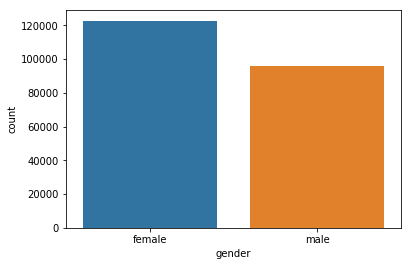

In [243]:
# plot gender counts
ax = sns.countplot(x="gender", data=df_demographics)

In [226]:
# create separate dataframes for genders
# there is probably a better way to do this ...
df_females = df_demographics.query("gender == 'female'")[['gender', 'patient_age']]
df_males = df_demographics.query("gender == 'male'")[['gender', 'patient_age']]

# testing output
# df_females.head()
# print(len(df_females))
# df_females.groupby('patient_age').count()

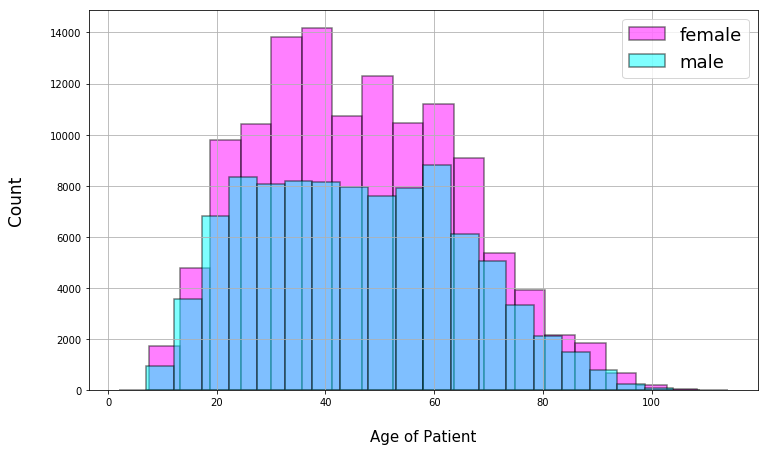

In [244]:
# plot age/gender distribution
ax = df_females["patient_age"]\
        .hist(bins=20, alpha=0.5, color='magenta', label='female', edgecolor='black', linewidth=1.5,figsize=(12,7))
ax = df_males["patient_age"]\
        .hist(bins=20, alpha=0.5, color='cyan', label='male', edgecolor='black', linewidth=1.5, figsize=(12,7))

ax.set_xlabel("\nAge of Patient", fontsize=15)
ax.set_ylabel("Count\n", fontsize=17)

plt.legend(loc='upper right', prop={'size': 18})
plt.show()

In [262]:
# build dataframe of restorations on surfaces
df_fillings = df_obs[['tooth_id', 'tooth_num', 'ada_code', 'event_name', 'm','o', 'd', 'b', 'l', 'f', 'i']]
# df_fillings = df_fillings.query(""" \
#                     ada_code.str.startswith('D') \
#                     and event_name.str.contains('filling') \
#                     and (m==1 or o==1 or d==1 or b==1 or l==1 or f==1 or i==1)"""
#                     , engine="python") # engine="python" is needed for str functions to work
# df_fillings = df_fillings.query(""" m==1 or o==1 or d==1 or b==1 or l==1 or f==1 or i==1"""
#                                     , engine="python") # engine="python" is needed for str functions to work
df_fillings.m = pds.to_numeric(df_fillings.m)
df_fillings.o = pds.to_numeric(df_fillings.o)
df_fillings.d = pds.to_numeric(df_fillings.d)
df_fillings.b = pds.to_numeric(df_fillings.b)
df_fillings.l = pds.to_numeric(df_fillings.l)
df_fillings.f = pds.to_numeric(df_fillings.f)
df_fillings.i = pds.to_numeric(df_fillings.i)
# df_fillings.head()

/usr/local/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [263]:
# add column with number of surfaces restored during procedure
df_fillings['num_restored_surfaces'] = df_fillings.m + df_fillings.o + df_fillings.d \
                                       + df_fillings.b + df_fillings.l + df_fillings.f + df_fillings.i

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [264]:
df_fillings.num_restored_surfaces = pds.to_numeric(df_fillings.num_restored_surfaces)
df_fillings.head()

/usr/local/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,tooth_id,tooth_num,ada_code,event_name,m,o,d,b,l,f,i,num_restored_surfaces
0,A_1_1_3273_3,3,D2750,porcelain fused to high noble metal crown rest...,0,0,0,0,0,0,0,0
1,A_1_1_3273_3,3,D6750,porcelain fused to high noble metal crown rest...,0,0,0,0,0,0,0,0
2,A_1_1_3273_6,6,D2750,porcelain fused to high noble metal crown rest...,0,0,0,0,0,0,0,0
3,A_1_1_3273_6,6,D6750,porcelain fused to high noble metal crown rest...,0,0,0,0,0,0,0,0
4,A_1_1_3273_31,31,D2752,porcelain fused to noble metal crown restorati...,0,0,0,0,0,0,0,0


In [265]:
df_fillings[df_fillings.num_restored_surfaces > 0].head()

,tooth_id,tooth_num,ada_code,event_name,m,o,d,b,l,f,i,num_restored_surfaces
7,A_1_1_3273_18,18,D2391,resin filling restoration procedure,0,1,0,0,0,0,0,1
8,A_1_1_3273_14,14,D2150,amalgam filling restoration procedure,1,0,0,0,1,0,0,2
9,A_1_1_3273_9,9,D2331,resin filling restoration procedure,1,0,0,0,0,0,1,2
10,A_1_1_3273_24,24,D2330,resin filling restoration procedure,0,0,0,0,0,0,1,1
11,A_1_1_3273_25,25,D2330,resin filling restoration procedure,0,0,0,0,0,0,1,1


In [ ]:
# find number of procedures per tooth
tooth_counts = df_fillings.groupby('tooth_num')['tooth_num'].count()
# tooth_counts

In [ ]:
%matplotlib inline
# draw bar chart showing the number of procedures performed on each tooth (number)
ax = tooth_counts.plot.bar(figsize=(15,10)) 

# rotate the ticks on the x axis
plt.xticks(rotation=0)

# configure labels
# note the use of '\n' to create space between ticks and labels
ax.set_xlabel("\nTooth Number", fontsize=15)
ax.set_ylabel("Procedure Count\n", fontsize=15)
ax.tick_params(labelsize='large')

plt.show()

In [35]:
import numpy
nan = numpy.nan
# build dataframe of teeth that have been extracted or missing
# note the use of engine="python"
# df_missing = df_obs[df_obs.extract_date.notnull() | df_obs.missing_date.notnull()]

df_missing = df_obs[ ~np.isnat(df_obs.extract_date) | ~np.isnat(df_obs.missing_date)]

temp = df_missing[['tooth_id', 'tooth_num', 'extract_date', 'missing_date']]
# temp.head()
temp.groupby('tooth_num').count()

,tooth_id,extract_date,missing_date
tooth_num,,,
1,154,135,154
10,204,169,204
11,139,124,139
12,246,204,246
13,241,204,241
14,505,446,505
15,508,445,508
16,153,135,153
17,171,155,171


In [ ]:
# find counts for each tooth type

missing_counts = temp.groupby('tooth_num')['tooth_num'].value_counts()
# missing_counts = df_missing['tooth_num'].size()

missing_counts

In [ ]:
# draw bar chart showing the number of extracted or missing teeth for each tooth (number)
ax = missing_counts.plot.bar(figsize=(15,10)) 

# rotate the ticks on the x axis
plt.xticks(rotation=0)

# configure labels
# note the use of '\n' to create space between ticks and labels
ax.set_xlabel("\nExtraced or Missing Tooth", fontsize=15)
ax.set_ylabel("Extracted or Missing Count\n", fontsize=15)
ax.tick_params(labelsize='large')

plt.show()

# DOES THIS PLOT MAKE SENSE? IT SEEMS WRONG.

In [ ]:
# create dataframe of only suface info
df_surfaces = df_fillings[['m', 'o', 'd', 'b', 'l', 'f', 'i', 'num_restored_surfaces']]

# df_surfaces.head()

In [ ]:
# calc number of surfaces restored for each surface
# note we are ignoring the number of restored surfaces (for now)
surface_counts = df_surfaces[['m', 'o', 'd', 'b', 'l', 'f', 'i']].apply(sum)

# surface_counts

In [ ]:
# create bar chart (flipped on its side) to show number of restorations per service
ax = surface_counts.plot.barh(figsize=(10,5))

# configure labels
ax.set_xlabel("\nSurface Restored Count", fontsize=15)
ax.set_ylabel("Tooth Surface\n", fontsize=15)
ax.tick_params(labelsize='x-large')

plt.show()

In [ ]:
# calc number of surfaces restored on a tooth for each procedure (i.e., number of surfaces filled during procedure)
temp = pds.DataFrame(df_fillings[['tooth_num', 'num_restored_surfaces']]\
                        .groupby(['num_restored_surfaces', 'tooth_num']).size())

# temp.head()

In [ ]:
# note the use of fill_values for NaN
restored_surface_counts = temp.unstack('num_restored_surfaces', fill_value=0)
restored_surface_counts.columns = ['1', '2', '3', '4', '5', '6']

# restored_surface_counts

In [ ]:
# do some checks
# df_fillings.query('tooth_num == 32 and num_restored_surfaces == 5')['num_restored_surfaces'].count() # matches
# df_fillings.query('tooth_num == 30 and num_restored_surfaces == 5')['num_restored_surfaces'].count() # matches
# df_fillings.query('tooth_num == 20 and num_restored_surfaces == 2')['num_restored_surfaces'].count() # matches

In [ ]:
# make simple plot of counts
# first do a check, and note that there are only 3 restorations of 6 surfaces (which seems not possible)
# the heatmap also reflects this ...
counts_per_surface = pds.DataFrame(restored_surface_counts.apply(sum))

# set index and column name
counts_per_surface.index.name = 'num_surfaces_restored'
counts_per_surface.columns = ['count']

# counts_per_surface

In [ ]:
ax = counts_per_surface.plot.bar(figsize=(10,5), color='green', legend=False)

# configure X and Y labels
ax.set_xlabel("\nNumber of Surfaces Restored", fontsize=20)
ax.set_ylabel("Procedure Count\n", fontsize=20)
ax.tick_params(labelsize='xx-large')

# rotate the ticks on the x axis
plt.xticks(rotation=0)

plt.show()

In [ ]:
plt.figure(figsize = (20,30)) # this sets width and height of the figure

# fmt='d' means annotations are digits, annot_kws={"size":15} sets the size of the annotation font
ax = sns.heatmap(restored_surface_counts, cmap='Spectral_r', linewidths=1.0, annot=True, fmt='d', annot_kws={"size":15})

# rotate the ticks on the y axis
plt.yticks(rotation=0)

# configure X and Y labels
ax.set_xlabel("\nTooth Surface", fontsize=25)
ax.set_ylabel("Number of Surfaces Restored by Procedure\n", fontsize=25)
ax.tick_params(labelsize='xx-large')

plt.show()

In [ ]:
# create a data structures to show a heatmap of teeth and surfaces
# build dataframe of tooth and surface info
df_tooth_surfaces = df_fillings[['tooth_num', 'm', 'o', 'd', 'b', 'l', 'f', 'i']]

# df_tooth_surfaces.head()

In [ ]:
# for each tooth group, sum the surfaces restored
grouped_df = pds.DataFrame(df_tooth_surfaces.groupby('tooth_num').sum())
grouped_df.columns = ['m', 'o', 'd', 'b', 'l', 'f', 'i']

# grouped_df.head()

In [ ]:
# make a heat map that shows the number of surfaces restored per tooth
# the surface is on the X axis, the tooth is on the Y axis

plt.figure(figsize = (20,30)) # this sets width and height of the figure

# fmt='d' means annotations are digits
ax = sns.heatmap(grouped_df, cmap='Spectral_r', linewidths=1.0, annot=True, fmt='d', annot_kws={"size":15})

# rotate the ticks on the y axis
plt.yticks(rotation=0)

# configure X and Y labels
ax.set_xlabel("\nTooth Surface", fontsize=25)
ax.set_ylabel("Tooth Number\n", fontsize=25)
ax.tick_params(labelsize='xx-large')

plt.show()
